In [8]:
using IntervalConstraintProgramming, TaylorModels, LazySets, Plots

using TaylorModels: Interval

Let $\mathcal{F}: (p(x_0, t), I)$ a Taylor Model flowpipe and $\mathcal{G}$ be a polyhedron that represents the guard.

The intersection between the guard and the flowpipe is:

$$
\mathcal{F} \cap \mathcal{G} = \{x : x = p(x_0, t) + y \wedge x_0 \in dom(\mathcal{F}) \wedge t \in [0, \delta] \wedge y \in rem(\mathcal{F}) \wedge x \in \mathcal{G} \}.
$$

To fix ideas, let $\mathcal{G}: a x \leq b$ be a hyperplanar guard, and ignore the time variable in the taylor model flowpipe.

In [21]:
G = HalfSpace([-1.0, 0.0], -1.0) #  x >= 1.0

HalfSpace{Float64,Array{Float64,1}}([-1.0, 0.0], -1.0)

In [83]:
ord = 4
N = 2
dom = Interval(0.8, 1.2) × Interval(-0.2, 0.2)
x0 = [1.0, 0.0]
set_variables(Float64, "x", order=2ord, numvars=N)

# taylor model independent variables
x = [TaylorModelN(i, ord, IntervalBox(x0), dom) for i=1:N]

2-element Array{TaylorModelN{2,Interval{Float64},Float64},1}:
  [1, 1] + [1, 1] x₁ + [0, 0]
           [1, 1] x₂ + [0, 0]

In [97]:
# a taylor model flowpipe
F = [x[1]^2 * x[2]^2, -x[1] * x[2]^2]

2-element Array{TaylorModelN{2,Interval{Float64},Float64},1}:
  [1, 1] x₂² + [2, 2] x₁ x₂² + [1, 1] x₁² x₂² + [0, 0]
               [-1, -1] x₂² + [-1, -1] x₁ x₂² + [0, 0]

Let's visualize the Taylor model flowpipe `F`:

In [98]:
evaluate(F[1], [1.0, 2.0])

[16, 16]

In [99]:
using Distributions

D = domain(F[1])
U1 = Uniform(inf(D[1]), sup(D[1]))
U2 = Uniform(inf(D[2]), sup(D[2]))
Frange = Vector{IntervalBox{2, Float64}}()
npoints = 5e2
for i in 1:npoints
    u1, u2 = rand(U1), rand(U2)
    y1 = evaluate(F[1], [u1, u2])
    y2 = evaluate(F[2], [u1, u2])
    push!(Frange, y1 × y2)
end

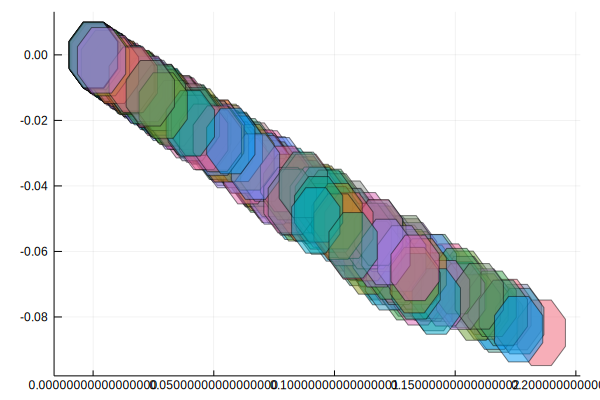

In [100]:
b = Ball2(zeros(2), 0.01)
Frange2 = [convert(Hyperrectangle, Fi) ⊕ b for Fi in Frange];

plot(Frange2)

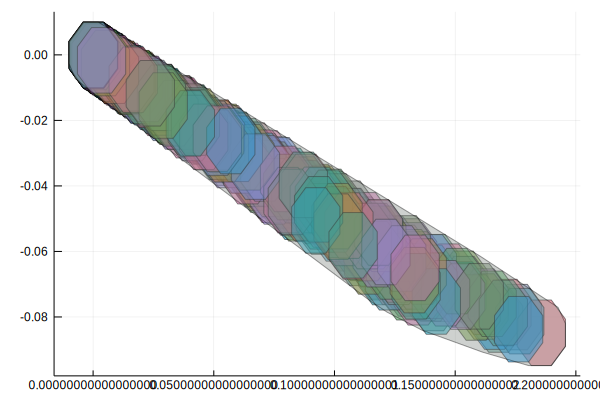

In [101]:
plot!(ConvexHullArray(Frange2), alpha=.4)

In [105]:
F[1]

 [1, 1] x₂² + [2, 2] x₁ x₂² + [1, 1] x₁² x₂² + [0, 0]

In [111]:
S1a = @constraint(x > 0 , [x, y])

Separator:
  - variables: x, y
  - expression: 1x ∈ [0, ∞]

In [112]:
const ICP = IntervalConstraintProgramming

S1a = ICP.@constraint(x1 - x2 == 0, [x1, x2, x10, x20])

Separator:
  - variables: x1, x2
  - expression: x1 - x2 ∈ [0, 0]

In [103]:



S1b = @constraint(y > 0 , [x, y])

    S1 = S1a ∩ S1b
paving = pave(S1, IntervalBox(-3..3, -3..3), 2.0, 0.5)

false

In [ ]:
if x == false
    ...
end

In [ ]:
# taylor model in one variable
function bounds_TM(func::Function, dom::Interval, ord::Int)
    x0 = Interval(mid(dom))
    x = TaylorModel1(ord, x0, dom)
    return evaluate(func(x), dom - x0)
end

# taylor model in N variables
function bounds_TM(func::Function, dom::IntervalBox{N}, ord) where {N}
    x0 = mid(dom)
    set_variables(Float64, "x", order=2ord, numvars=N)
    x = [TaylorModelN(i, ord, IntervalBox(x0), dom) for i=1:N]
    return evaluate(func(x...), dom - x0)
end